# Fase (1): Importação e exploração dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

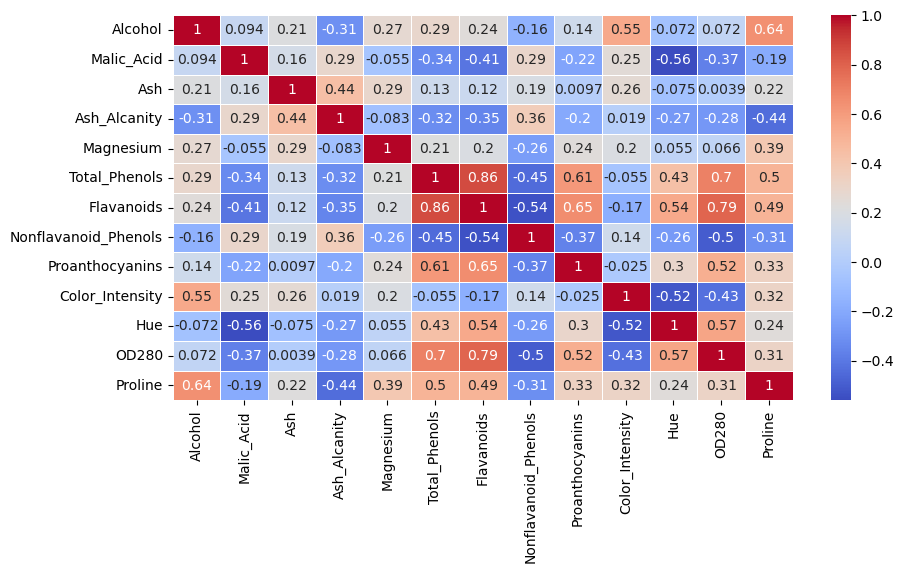

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='coolwarm')

#### Poderíamos retirar o Flavonoids ou Total_Phenols da clusterização, pois são informações redundantes (alta correlação)

### Normalização do conjunto de dados

In [9]:
minmax = MinMaxScaler()
norm = minmax.fit_transform(df)
norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [10]:
df_norm = pd.DataFrame(data=norm, columns=df.columns)

In [11]:
df_norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# Fase (2): Investigação sobre o total de clusters

### K-means
* Vamos analisar o número de clusters pelo método do cotovelo, verificando a "inércia" ou "wcss"

In [13]:
from sklearn.cluster import KMeans

In [14]:
clusters = [i for i in range(1,9)]
wcss = list()

for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)   

In [16]:
clusters, wcss

([1, 2, 3, 4, 5, 6, 7, 8],
 [95.5995377847106,
  64.5524436609277,
  48.96051713667649,
  44.88760458085281,
  42.69383944786927,
  40.172128880551206,
  38.66020412011863,
  37.3684482843761])

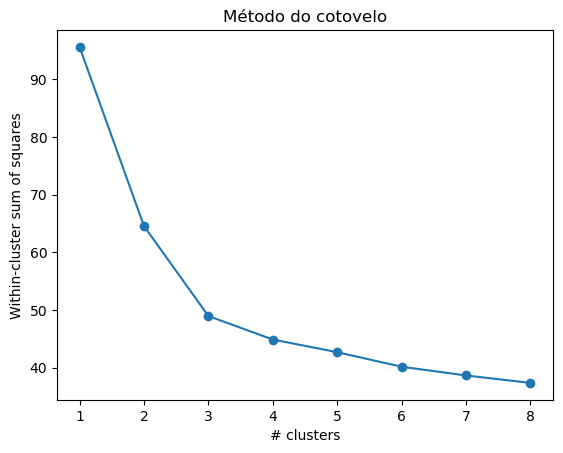

In [17]:
plt.figure(dpi=100)
plt.plot(clusters, wcss, '-o')
plt.title('Método do cotovelo')
plt.xlabel('# clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

#### Percebam que o erro já não diminui de forma significativa quando estamos incluindo 4 clusters na análise. Desta forma, é interessante usar 3 clusters aqui, onde há um ponto de inflexão.

### Agrupamento hierárquico
* Vamos analisar o total de clusters bia dendrograma, utilizando a geração do diagrama a partir da biblioteca scipy

In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

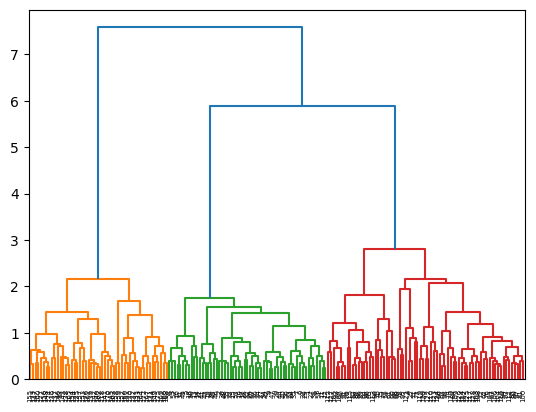

In [21]:
plt.figure(dpi=100)
link = linkage(df_norm, method='ward')
dendrogram(link)
plt.show()

#### Vejam que temos três cores incluídas aqui, assim nos parece que 3 clusters é a melhor alternativa.

### Vamos utilizar a métrica da silhueta para verificarmos o total de clusters.

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
# Vamos comparar o escore da silhueta para 2 até 8 clusters

clusters = [i for i in range(2,9)]
silhueta_kmeans = list()
silhueta_ah = list()

for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans.fit(df_norm)
    silhueta_kmeans.append(silhouette_score(df_norm, kmeans.labels_))

    ah = AgglomerativeClustering(n_clusters=c)
    ah.fit(df_norm)
    silhueta_ah.append(silhouette_score(df_norm, ah.labels_))

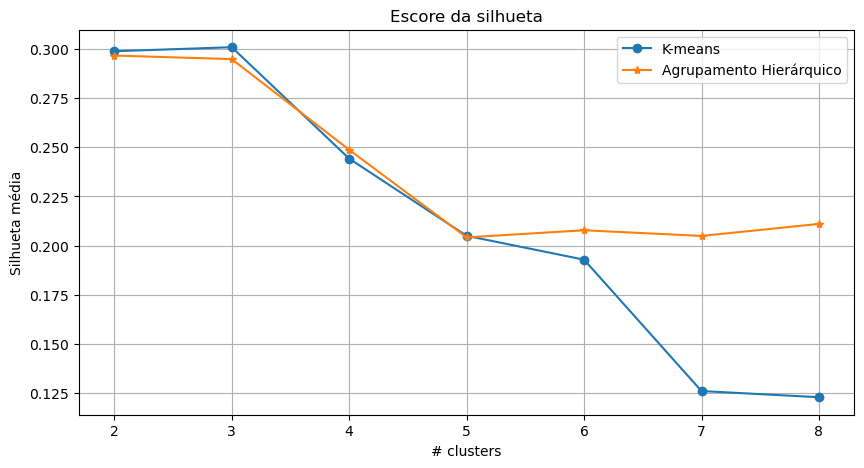

In [25]:
# Visualizando os resultados
plt.figure(figsize=(10,5))
plt.plot(clusters, silhueta_kmeans, '-o',
        clusters, silhueta_ah, '-*')
plt.title('Escore da silhueta')
plt.xlabel('# clusters')
plt.ylabel('Silhueta média')
plt.legend(['K-means', 'Agrupamento Hierárquico'])
plt.grid()
plt.show()

#### Parece que com 3 clusters nós continuamos tendo uma alta silhueta média, então podemos definir que 3 clusters é o mais interessante.

# Fase (3): Criação e interpretação básica dos clusters

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [29]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [30]:
df['Cluster'] = kmeans.labels_

In [31]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


### Interpretando os nossos clusters

<Axes: xlabel='Cluster', ylabel='count'>

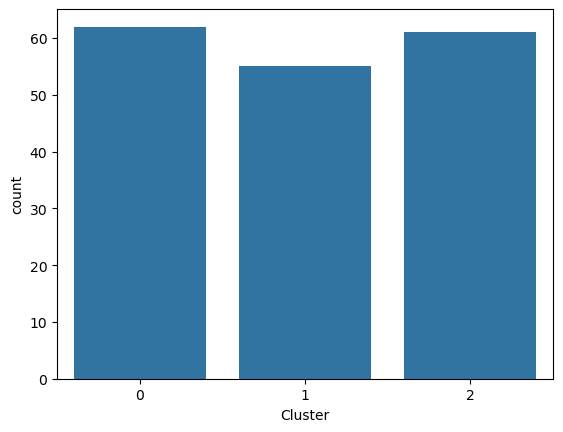

In [32]:
sns.countplot(data=df, x='Cluster')

In [34]:
df.Cluster.value_counts()

Cluster
0    62
2    61
1    55
Name: count, dtype: int64

<Axes: xlabel='Cluster', ylabel='Alcohol'>

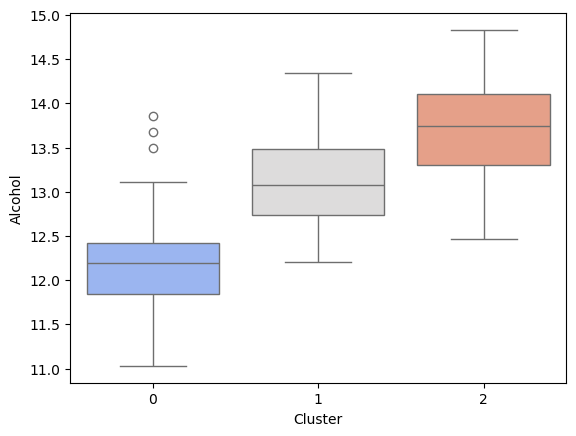

In [35]:
sns.boxplot(data=df, x='Cluster', y='Alcohol', palette='coolwarm')

<Axes: xlabel='Malic_Acid', ylabel='Color_Intensity'>

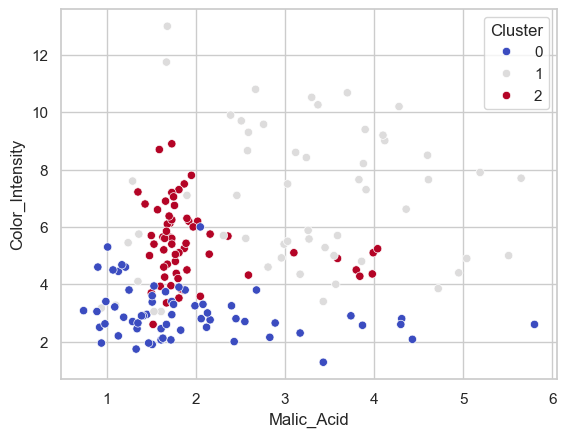

In [38]:
sns.set(style='whitegrid')
sns.scatterplot(data=df, x='Malic_Acid', y='Color_Intensity', hue='Cluster', palette='coolwarm')

In [39]:
df.groupby('Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.213226,1.938710,2.244355,20.298387,92.790323,2.293871,2.152581,0.348226,1.669839,3.011452,1.062419,2.877903,497.274194
1,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
